In [22]:
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

In [1]:
%cd /teamspace/studios/this_studio/Deeplab/
import wget
from inference.infer import *
import torch


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/teamspace/studios/this_studio/Deeplab


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
img_link = 'https://treetracker-production-images.s3.eu-central-1.amazonaws.com/2021.03.28.12.34.59_-4.531118333333334_38.248731666666664_6973c014-d0e7-4fa8-a80f-9495bfc8af3d_IMG_20210322_094829_8180242403936928723.jpg'
inhouse_default = '/teamspace/studios/this_studio/Deeplab/saved_models/best_deeplabv3plus_mobilenet_custom_os16_0.7854892764326529.pth'
downstreamed_large = '/teamspace/studios/this_studio/Deeplab/saved_models/india_sam_dino_250_samples_0.8495187035894669.pth'
downstreamed_small = '/teamspace/studios/this_studio/Deeplab/saved_models/india_sam_dino_250_samples_0.8940880817269634.pth'
downstreamed_tuned = '/teamspace/studios/this_studio/Deeplab/saved_models/base_sam_dino_india_tuned_freetown_eastafrica_haiti_0.8213798905479425.pth'

Device: cpu
Resume model from /teamspace/studios/this_studio/Deeplab/saved_models/india_sam_dino_250_samples_0.8495187035894669.pth
No ExifTags found: 'str' object has no attribute '_getexif'
Confidence is 0.7669207665401111


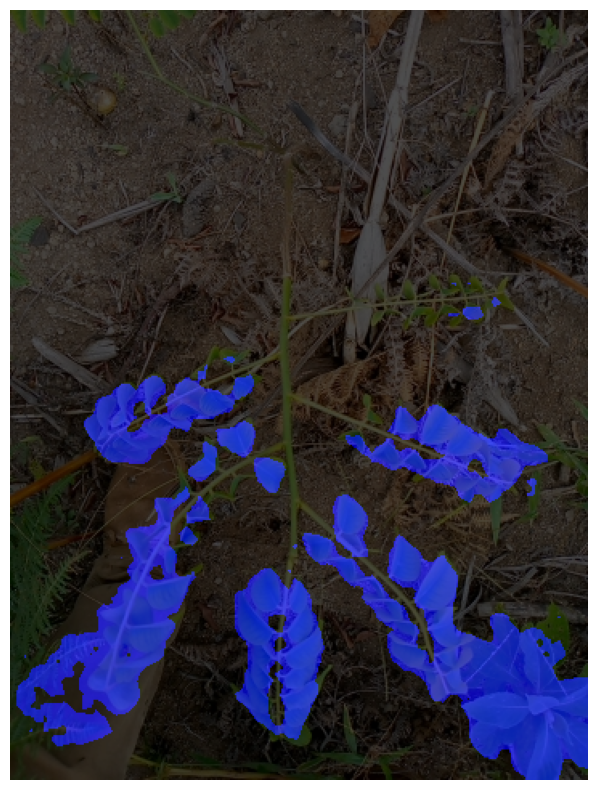

Overlayed Mask saved to /teamspace/studios/this_studio/Deeplab/test_overlayed.jpg


In [4]:
get_overlayed_mask(downstreamed_large, img_link)

In [6]:
samples = os.listdir('/teamspace/studios/this_studio/Deeplab/freetown_sam_dino_annotations/samples')
masks = os.listdir('/teamspace/studios/this_studio/Deeplab/freetown_sam_dino_annotations/binary_masks')

In [7]:
def show(image):
  sample = Image.open(image)
  plt.imshow(sample)
  plt.axis("off")
  plt.show()

In [11]:
print(os.getcwd())

/teamspace/studios/this_studio/Deeplab


In [24]:
def display_random(i, dataset_path):
    some_list = os.listdir(os.path.join(dataset_path,'samples'))
    print(len(some_list))
    for j in range(i):
        r = random.randint(0,len(some_list))
        sample_path = os.path.join(dataset_path, 'samples', some_list[r])
        mask_path = os.path.join(dataset_path, 'binary_masks/') + os.path.splitext(some_list[r])[0] + '_binarymask.jpg'
        show(sample_path)
        show(mask_path)

In [20]:
dataset_path = '/teamspace/studios/this_studio/Deeplab/freetown_sam_dino_annotations'

In [22]:
print(os.path.join(dataset_path,'samples'))

/teamspace/studios/this_studio/Deeplab/freetown_sam_dino_annotations/samples


1579


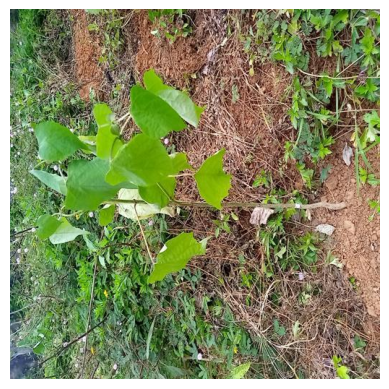

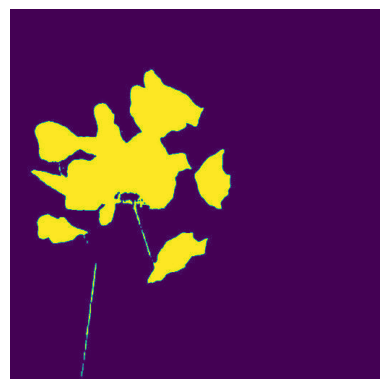

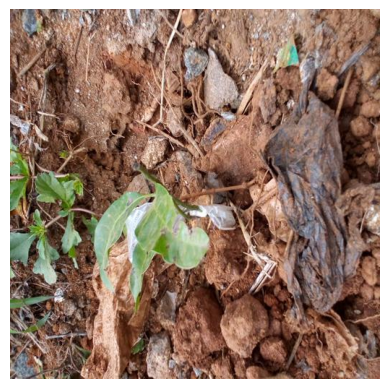

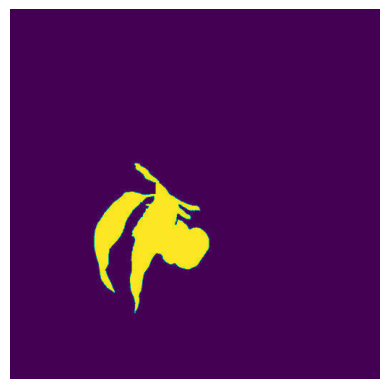

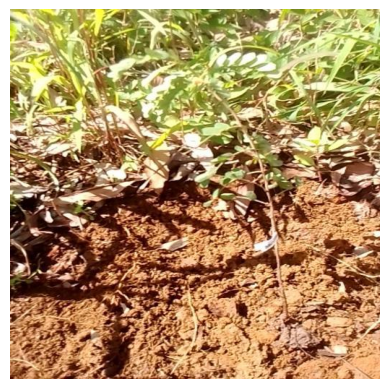

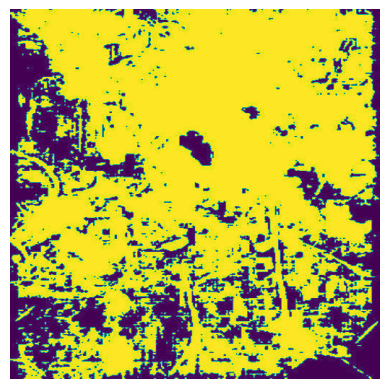

In [25]:
display_random(3, dataset_path)

In [7]:
import pandas as pd

import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('sam_dino_processed.csv')

In [5]:
df['Deeplab Confidence'] = pd.to_numeric(df['Deeplab Confidence'], errors='coerce')
df['SAM Score'] = pd.to_numeric(df['SAM Score'], errors='coerce')

# Filter rows based on conditions
filtered_files = df[(df['Deeplab Confidence'] > 0.9) & (df['SAM Score'] > 0.95)]['File'].tolist()

print(len(filtered_files))

757


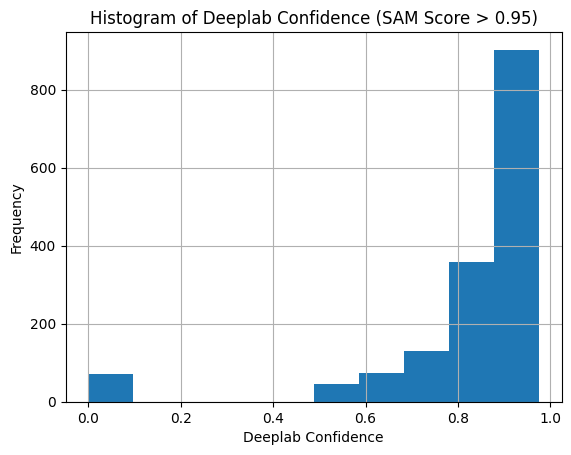

In [8]:
df['Deeplab Confidence'] = pd.to_numeric(df['Deeplab Confidence'], errors='coerce')
df['SAM Score'] = pd.to_numeric(df['SAM Score'], errors='coerce')

# Filter rows based on condition SAM Score > 0.95
filtered_df = df[df['SAM Score'] > 0.95]

# Create histogram
plt.hist(filtered_df['Deeplab Confidence'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Deeplab Confidence')
plt.ylabel('Frequency')
plt.title('Histogram of Deeplab Confidence (SAM Score > 0.95)')
plt.grid(True)
plt.show()

In [9]:
df['Deeplab Confidence'] = pd.to_numeric(df['Deeplab Confidence'], errors='coerce')
df['SAM Score'] = pd.to_numeric(df['SAM Score'], errors='coerce')

# Filter rows based on condition SAM Score > 0.95
filtered_df = df[df['SAM Score'] > 0.95]

# Filter rows where Deeplab Confidence is between 0.5 and 0.9
confidence_between_05_and_09 = filtered_df[(filtered_df['Deeplab Confidence'] >= 0.5) & (filtered_df['Deeplab Confidence'] <= 0.9)]

# Calculate percentage
total_samples = len(filtered_df)
samples_between_05_and_09 = len(confidence_between_05_and_09)
percentage = (samples_between_05_and_09 / total_samples) * 100

print(f"Percentage of samples with SAM Score > 0.95 and Deeplab Confidence between 0.5 and 0.9: {percentage:.2f}%")

Percentage of samples with SAM Score > 0.95 and Deeplab Confidence between 0.5 and 0.9: 47.50%


In [10]:
random_file = df['File'].sample().iloc[0]

print("Random element from the 'File' column:", random_file)

Random element from the 'File' column: freetown/TAMAINDI/2021.11.11.13.31.35_8.341631666666665_-13.215005_e833f436-04f9-4e82-a250-f51dead1beea_IMG_20211111_122502_8974468678644518726.jpg


In [14]:
df = pd.read_csv('sam_dino_processed.csv')

df['Deeplab Confidence'] = pd.to_numeric(df['Deeplab Confidence'], errors='coerce')
df['SAM Score'] = pd.to_numeric(df['SAM Score'], errors='coerce')
filtered_df = df[df['SAM Score'] > 0.95]
# Filter rows where Deeplab Confidence is between 0.5 and 0.9
confidence_between_05_and_09 = filtered_df[(filtered_df['Deeplab Confidence'] <= 0.9)]

# Get all file elements in a list
file_list = confidence_between_05_and_09['File'].tolist()
print(len(file_list))

822


In [15]:
good_samples = [i.replace("/", "_").lower() for i in file_list]

In [16]:
print(good_samples[0])

freetown_gmelarbo_2020.12.07.14.56.47_8.379528333333333_-13.127205_44cbe27c-8e4d-4227-8cbc-a80d6475013a_img_20201207_122853_-1315085445.jpg


In [2]:
import pandas as pd
df = pd.read_csv('202304291532_india.csv')
india_list = df['image_url'].tolist()

In [3]:
print(len(india_list))

12515


In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('india_deeplab_confidence_processed.csv')

# Count the number of rows where 'Deeplab Confidence' is greater than 0.85
confidence_gt_085_count = df[df['Deeplab Confidence'] > 0.85].shape[0]

print("Number of rows where Deeplab Confidence > 0.85:", confidence_gt_085_count)

Number of rows where Deeplab Confidence > 0.85: 5190


In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('india_deeplab_confidence_processed.csv')

# Count the number of rows where 'Deeplab Confidence' is greater than 0.85
confidence_gt_085_count = df[df['Deeplab Confidence'] > 0.95].shape[0]

print("Number of rows where Deeplab Confidence > 0.95:", confidence_gt_085_count)

Number of rows where Deeplab Confidence > 0.95: 0


In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('india_deeplab_confidence_processed.csv')

# Count the number of rows where 'Deeplab Confidence' is greater than 0.85
confidence_gt_085_count = df[df['Deeplab Confidence'] > 0.96].shape[0]

print("Number of rows where Deeplab Confidence > 0.96:", confidence_gt_085_count)

Number of rows where Deeplab Confidence > 0.96: 0


In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('india_deeplab_confidence_processed.csv') # india_deeplab_confidence_processed.csv

# Filter rows where 'Deeplab Confidence' is greater than 0.75 and less than 0.85
confidence_075_to_085 = df[(df['Deeplab Confidence'] > 0.75) & (df['Deeplab Confidence'] < 0.85)]

# Count the number of rows where 0.75 < 'Deeplab Confidence' < 0.85
confidence_075_to_085_count = confidence_075_to_085.shape[0]

print("Number of rows where 0.75 < Deeplab Confidence < 0.85:", confidence_075_to_085_count)


Number of rows where 0.75 < Deeplab Confidence < 0.85: 5434


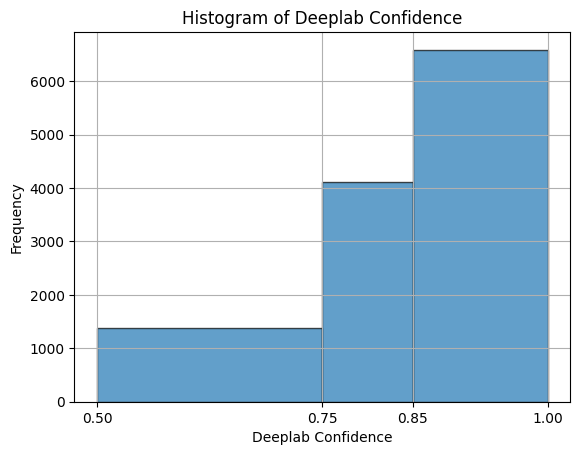

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('india_deeplab_confidence_processed.csv')

# Define the bins
bins = [0.5, 0.75, 0.85, 1.0]

# Plot the histogram
plt.hist(df['Deeplab Confidence'], bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Deeplab Confidence')
plt.ylabel('Frequency')
plt.title('Histogram of Deeplab Confidence')
plt.xticks(bins)
plt.grid(True)
plt.show()


In [1]:
import boto3

s3 = boto3.resource()

my_bucket = s3.Bucket('treetracker-training-images')
sample_objects = my_bucket.objects.filter(Prefix='pilot_annotations/Indian_Medicinal_Plants_itr_1/samples/')
mask_objects = my_bucket.objects.filter(Prefix='pilot_annotations/Indian_Medicinal_Plants_itr_1/binary_masks/')


sample_paths = []
mask_paths = []

for obj in sample_objects:
  sample_paths.append(obj.key)

for obj in mask_objects:
  mask_paths.append(obj.key)

print("masks - " + str(len(mask_paths)))
print("samples - " + str(len(sample_paths)))






masks - 2230
samples - 2230


In [2]:
my_bucket = s3.Bucket('treetracker-training-images')
sample_objects = my_bucket.objects.filter(Prefix='india_sam_dino_annotations_large/samples/')
mask_objects = my_bucket.objects.filter(Prefix='india_sam_dino_annotations_large/masks/')


sample_paths = []
mask_paths = []

for obj in sample_objects:
  sample_paths.append(obj.key)

for obj in mask_objects:
  mask_paths.append(obj.key)

print("masks - " + str(len(mask_paths)))
print("samples - " + str(len(sample_paths)))

masks - 4071
samples - 4071


In [4]:
print(sample_paths[0])

india_sam_dino_annotations_large/samples/india_carica papaya (pawpaw)2020.09.18.16.22.33_27.94776972848922_77.28961287997663_2c1d4f93-843b-4432-9e07-57c879c02dc2_img_20200918_155300_512968206581480670.jpg


In [8]:
import os

filename_without_extension = os.path.splitext(os.path.basename(sample_paths[0]))[0]
print(filename_without_extension)

india_carica papaya (pawpaw)2020.09.18.16.22.33_27.94776972848922_77.28961287997663_2c1d4f93-843b-4432-9e07-57c879c02dc2_img_20200918_155300_512968206581480670


In [9]:
from PIL import Image
import matplotlib.pyplot as plt
def show(image):
  sample = Image.open(image)
  plt.imshow(sample)
  plt.axis("off")
  plt.show()

In [17]:
def download_and_show(sample_key):
    my_bucket.download_file(sample_key, 'test.jpg')
    show(os.getcwd() + '/test.jpg')
    print(os.path.splitext(os.path.basename(sample_key))[0] + '_binarymask.jpg')
    my_bucket.download_file('india_sam_dino_annotations_large/masks/' + os.path.splitext(os.path.basename(sample_key))[0] + '_binarymask.jpg', 'test_binarymask.jpg')
    show(os.getcwd() + '/test_binarymask.jpg')

In [ ]:
import random

def random_display(no_of_samples):
    random_samples = random.sample(sample_paths, no_of_samples)
    for i in random_samples:
        download_and_show(i)

random_display(5)